<a href="https://colab.research.google.com/github/Yannlpl/Yannlpl/blob/circleci-project-setup/MAJ_Class_1_Group1_stockPrice_Project_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#        NEURAL NETWORKS AND DEEP LEARNING FOR FINANCE     
##                    Rennes School of Business
#####       
                                        Winter 2022
                                 Stocks data forecast#
 
Group Project :                                             
##  Use Deep Learning Techniques to model stocks data                                                

### Please submit your solution to this lab excercise.

The following Paython code is modelling of stock data with deep learning. Your task is to find optimum articture for deep learning model,

For this task, you need to pick a stock symbole in the market,accourding to your group number, and forecast to forecast stock prcie. Try to keet the model architecture simple. 

Report

For this task, you need to pick a stock symbole in the market,accourding to your group number, and forecast to forecast stock prcie. 


##Students name 	  Student No.	      
#### ETU20181485
#### ETU20191487
#### ETU20210234

##Group: 

##To hand in
###Guidelines for report layout
Please rename file accourding to your class and group number 
Class_No_GroupNo_stocks_Project2021 

Select a symbol according  to your group number for this link

https://bit.ly/2IK70kN


 Report your results with Python code in this nootbook file. Please explain the result in details. Reporting codes and graphs without explainations is not enough.
•	You need to explain results and graphs, just graphs cannot be considered as grading
•	Name your report: GroupNo, upload word format file to Turnitin on Moodle.
•	The assignment counts for 20% of the module grade.
•	The Rennes School of Business policy is to not give grades for continuous assessment during the term, so you will only receive your grade when you get the overall module grade.

#Deadline for reporting is 28 February 2022 (23:59).

##Grading

The project will be graded from zero to 20, and a minimum of 10 points are required to pass the project. Higher scores will yield higher grades. The clarity and quality of motivations and comments play an important role in the grading.

##Plagiarism Warning 
Plagiarism is defined as direct copying of textual material of other people’s work, and presenting them as one’s own without acknowledgement.
No student shall represent the work of another person as his own in any academic assignment.
Plagiarism is a very serious offence. There are clear university rules as well as severe penalties for plagiarism at Rennes School of Business. 

Plagiarism Declaration

We, ...., hereby declare that we created this piece of work by ourselves, only with the sources stated above and without further aid. we consent to a plagiarism check of this work by conventional and electronic means (digitalization and automatized check by software). 


--------------------------------------                                     -------------------------                                                                 




##  Download history data from yahoo finance

Please select the symbol of stock from this list

* Group.   Symbol | Company 
1.   PFE | Pfizer
2.   AMZN | Amazon.com
1.   NFLX | Netflix Inc
1.   DAL | Delta Air Line
1.   BA | Boeing Co
2.   C | Citigroup Inc 
1.   BNTX | BioNTech SE - ADR
2.   ZM | Zoom Video Communications Inc
1.   MRNA | Moderna therapeutics 
3.  BTC-USD |  Bitcoin USD

In [ ]:
# The first the step is to download history data from yahoo finance.
# Install yahoo finance package 

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 9.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np 
import pandas as pd
import plotly.graph_objs as go

import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Select Symbol from the list according to your group. 
#https://bit.ly/2IK70kN

MyTicker = yf.Ticker("AVGO")

In [ ]:
# if there is a problem for downloading data for symbol fron the above list, you can select the symbol of stock from the follwing list

# Group. Symbol | Company
# PFE | Pfizer
# AMZN | Amazon.com
# NFLX | Netflix Inc
# DAL | Delta Air Line
# BA | Boeing Co
# C | Citigroup Inc
# BNTX | BioNTech SE - ADR
# ZM | Zoom Video Communications Inc
# MRNA | Moderna therapeutics
# BTC-USD | Bitcoin USD

In [ ]:
# Question 1: Write about stock, you can get stock information from yahoo
# This stock is related to Broadcom Inc, Broadcom Inc. is an American designer, developer, manufacturer and global supplier of a wide range of semiconductor 
# and infrastructure software products. Broadcom's product offerings serve the data center, networking, software, broadband, wireless, and storage 
# and industrial markets. The company's IPO took place on 9 August 2009 at USD 16.43, and by 18 February 2022 the share was trading at USD 575.56.
print(MyTicker.info)
## More options: https://github.com/ranaroussi/yfinance

{'zip': '95131-2313', 'sector': 'Technology', 'fullTimeEmployees': 20000, 'longBusinessSummary': 'Broadcom Inc. designs, develops, and supplies various semiconductor devices with a focus on complex digital and mixed signal complementary metal oxide semiconductor based devices and analog III-V based products worldwide. The company operates in two segments, Semiconductor Solutions and Infrastructure Software. It provides set-top box system-on-chips (SoCs); cable, digital subscriber line, and passive optical networking central office/consumer premise equipment SoCs; wireless local area network access point SoCs; Ethernet switching and routing merchant silicon products; embedded processors and controllers; serializer/deserializer application specific integrated circuits; optical and copper, and physical layers; and fiber optic transmitter and receiver components. The company also offers RF front end modules, filters, and power amplifiers; Wi-Fi, Bluetooth, and global positioning system/glo

In [ ]:
# get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
data_s['Date'] = data_s.index

In [ ]:
# Question 2: check data and provide statistical description of stock price, Explain?
# we can see minimum price is 11.019129 close, maximum price registered at close from now was 674.280029. 
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the describe method
print(data_s.describe())
data_s.head(5)

              Open         High          Low        Close        Volume  \
count  3162.000000  3162.000000  3162.000000  3162.000000  3.162000e+03   
mean    155.144664   157.010454   153.178764   155.172449  2.523289e+06   
std     147.626362   149.316759   145.883376   147.658632  2.174803e+06   
min      11.102786    11.270087    10.897460    11.019134  3.080000e+04   
25%      27.239323    27.548625    26.858427    27.219278  1.481750e+06   
50%     108.450558   110.146724   107.070901   108.337124  2.094850e+06   
75%     228.713194   231.833819   225.807453   229.272175  3.002550e+06   
max     677.549988   677.760010   669.119995   674.280029  5.602800e+07   

         Dividends  Stock Splits  
count  3162.000000        3162.0  
mean      0.019927           0.0  
std       0.235065           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       4.100000           0.0  


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2009-08-06,12.547667,12.859457,11.832830,12.304318,24197800,0.0,0,2009-08-06
2009-08-07,12.281502,12.745386,12.190247,12.494432,2454300,0.0,0,2009-08-07
2009-08-10,12.646528,12.646528,11.870854,12.144622,2421000,0.0,0,2009-08-10
2009-08-11,12.152229,12.167438,11.787206,11.916485,2305400,0.0,0,2009-08-11
2009-08-12,12.281505,12.319529,11.908878,12.167436,1451300,0.0,0,2009-08-12


## Analysis of time series of Stock Price

In [ ]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

In [ ]:
# Plot time series the close price and volume of stock price 
# Question 3: Explain the time series plots and try to identify important events
# No change is observable until December 2013, when Avago Technologies (formerly Broadcom) announced in December 2013 that it had acquired LSI Corporation 
# for $6 billion, allowing it to enter the data centre storage chip market, which causes the AVGO share price to rise.
# Electronic chips have become a major strategic issue for the world's major powers. The shortage that began in 2021 has driven up the prices of these 
# components and the share prices of various chip suppliers such as Broadcom. The share price rose from USD 314 in January 2020 to USD 674.28 at its 
# highest peak in December 2021.
  
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing stock's price of Broadcom 2009-2022",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume of Broadcom's stock 2009-2022",xaxis_title="Date", yaxis_title="Volume")
fig.show()


In [ ]:
data = data_s[['Date','Close']]
print(data.head(2))
print(data.tail(2))

                 Date      Close
Date                            
2009-08-06 2009-08-06  12.304318
2009-08-07 2009-08-07  12.494432
                 Date      Close
Date                            
2022-02-24 2022-02-24  580.00000
2022-02-25 2022-02-25  588.01001


### Test of stationarity

In [ ]:
## Test of stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
### Question 4: Explain the assuption of Augmented Dickey-Fuller test and ADF test statistic test
# The assumption for the Augmented Dickey-Fuller test is the Null Hypothesis H0: Series is not stationary and
# the Alternate hypothesis is that Series is stationary, which means that series has no unit root.

In [ ]:
### Question 5: What is unit root?
# Unit root is a unit measure that allows us to see how much a Time Series model has stationarity. 
# There are several tests to calculate the stationarity of a series like Dickey-Fuller test or ADF for instance.

In [ ]:
### Question 6: Check the stationary property of stock price and explain your finding
# We can see that p-value is greater than significance level of 0.05, and the ADF statistics is greater than any of the critical values (1%, 5% and 10%),
# so, there is no reason to reject the null hypothesis. So, the time-series is non-stationary.
adf_test(data_s['Close'])


Augmented Dickey-Fuller Test: 
ADF test statistic         2.805275
p-value                    1.000000
# lags used               26.000000
# observations          3135.000000
critical value (1%)       -3.432438
critical value (5%)       -2.862462
critical value (10%)      -2.567261
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
# Question 7: Calculate the first difference of stock price and Check the stationary property of the data
# We can observe via the first difference of stock price that the p value is very less than the 5% significance level,
# so we reject the null hypothesis and assume that the series is stationary.
from statsmodels.tsa.statespace.tools import diff
change= diff(data_s['Close'],k_diff=1)
adf_test(change)


Augmented Dickey-Fuller Test: 
ADF test statistic     -1.369785e+01
p-value                 1.306588e-25
# lags used             2.500000e+01
# observations          3.135000e+03
critical value (1%)    -3.432438e+00
critical value (5%)    -2.862462e+00
critical value (10%)   -2.567261e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
#Question 8: Plot time series the first difference of stock price and explain your finding

fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= change)])
fig.update_layout(title="First difference closing stock's price of Broadcom 2009-2022",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()



In [ ]:
# Check the stationary property of the first difference of stock price
adf_test(change)

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.369785e+01
p-value                 1.306588e-25
# lags used             2.500000e+01
# observations          3.135000e+03
critical value (1%)    -3.432438e+00
critical value (5%)    -2.862462e+00
critical value (10%)   -2.567261e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
# You can select some part of your data # decide based on your data, 2016 is good for our data
dfs = data.loc[data['Date'] >'2016']
dfs.head(1)

,Date,Close
Date,,
2016-01-04,2016-01-04,117.41774


In [ ]:
dfs.tail(1)

,Date,Close
Date,,
2022-02-25,2022-02-25,588.01001


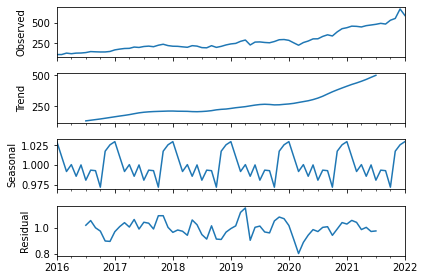

In [ ]:
# Decompose the stock price to its components:
# Stock price= Trend+Seasonal+Error
series_close=dfs['Close']
series_close.index=pd.to_datetime(series_close.index)
# Correct the starting and final dates of stock price (dfs.head(1) and dfs.tail(1))
idx=pd.date_range('2016-01-02','2022-02-03',freq='M') # can put M for monthly, W for weekly
series_close=series_close.reindex(idx,method='pad')
series_close=series_close.astype('float32')
series_close.shape
decomposed = seasonal_decompose(series_close,model='multiplicative')
fig = decomposed.plot()

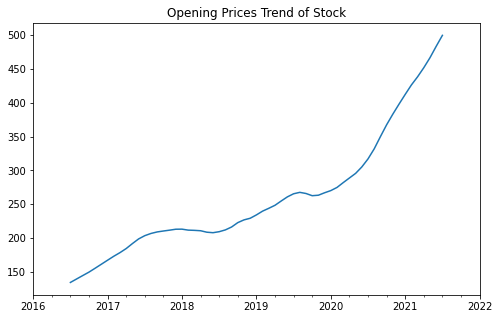

In [ ]:
#Question 9:  Plot Trend component of stock data and explain the your findings
#le peak n'est pas encore atteint, on peut voir une accélération à partir de 2020
decomposed.trend.plot(figsize=(8,5),title='Opening Prices Trend of Stock')



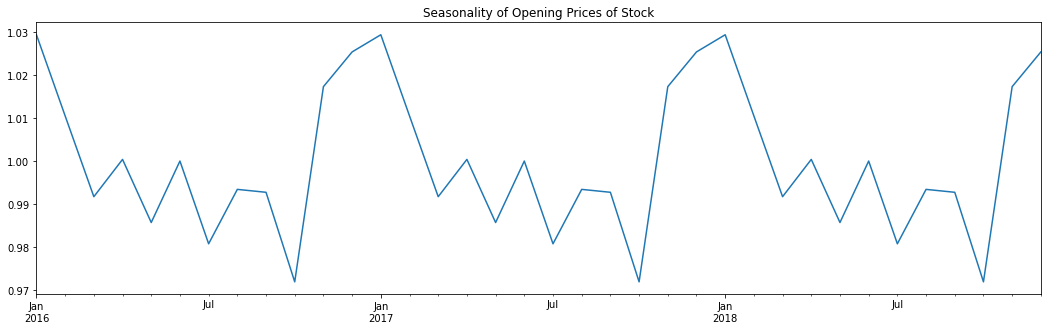

In [ ]:
# Question 10: Plot Seasonality component of stock data and explain the your findings
# clear seasonality pattern, peak oberved during December each year
decomposed.seasonal[:36].plot(figsize=(18,5),title='Seasonality of Opening Prices of Stock');



Extracing High, Low, Close from the previous dataframe and load to other and discarding date.

In [ ]:
#Extracing Close from the dataframe and discarding date.
df = dfs.iloc[:,1:]
df.head(5)

,Close
Date,
2016-01-04,117.417740
2016-01-05,113.489532
2016-01-06,109.998650
2016-01-07,106.499580
2016-01-08,105.798103


## LSTM Model 

### Splitting the dataframe to make training dataset

In [ ]:
# For the LSTM Model Splitting the dataframe to make training dataset.
# Use 80% of data as training data
training_set = df.iloc[:round(len(df)*0.8)].values

In [ ]:
# Scale data to the range (0,1)
#Question 11: Why we should scale data? How the MinMaxScaler function works?

scaler = MinMaxScaler(feature_range=(0, 1))
training_set = scaler.fit_transform(training_set)

 

In [ ]:
# Here, we are going to make such arrangement with the training dataset that previous 100 Days will be used to predict the next 10 days.

trainX = [] 
trainY = []

in_future = 10 # Number of days we want to predict into the future 
in_past = 120 # Number of past days we want to use to predict the future

for i in range(in_past, len(training_set) - in_future +1): 
    trainX.append(training_set[i - in_past:i, 0:training_set.shape[1]]) 
    trainY.append(training_set[i + in_future - 1:i + in_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape = {}.'.format(trainX.shape)) 
print('trainY shape = {}.'.format(trainY.shape))

trainX shape = (1110, 120, 1).
trainY shape = (1110, 1).


### Preparing Keras Model.

In [ ]:
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

#Question 13: Explain the structure of above deel plearning model.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 120, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 81,001
Trainable params: 81,001
Non-trai

### Fitting the Model to the training dataset

In [ ]:
# train model on full train set, with 80/20 CV split
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
28/28 [==============================] - 10s 355ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0134 - val_accuracy: 0.0045
Epoch 2/30
28/28 [==============================] - 10s 346ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0045
Epoch 3/30
28/28 [==============================] - 10s 367ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_accuracy: 0.0045
Epoch 4/30
28/28 [==============================] - 10s 361ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0045
Epoch 5/30
28/28 [==============================] - 10s 364ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0045
Epoch 6/30
28/28 [==============================] - 10s 362ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0045
Epoch 7/30
28/28 [==============================] - 10s 357ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0

### Ploting the accuracy and valid accuracy so as to observe the learning of the Model.


Mean_loss: 0.34%

Mean_val_loss: 1.03%


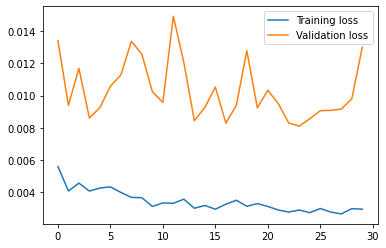

In [ ]:
Mean_loss = np.mean(history.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(history.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

#Question 14: Explain the accuracy plots for training and validation sets



It seems that the model is learning quite well. 
And the overfitting is not present in our model.

### Create test dataset and Prediction

In [ ]:
test_data =df.iloc[round(len(df)*0.8):,:].values
scaler = MinMaxScaler(feature_range=(0, 1))
test_data = scaler.fit_transform(test_data)

prediction_stocks = []

for i in range(120, len(test_data)):
    prediction_stocks.append(test_data[i-120:i])
    
prediction_stocks = np.array(prediction_stocks)
#Now we are going to feed in the prediction dataset to the model.
predictions = model.predict(prediction_stocks)

In [ ]:
prediction_stocks.shape

(190, 120, 1)

In [ ]:
# The predicted data need's to be invert transformed so that the values returns into the original scale.
y_pred_future = scaler.inverse_transform(predictions)
#Taking these predicted data and making it into dataframe so that it can be interpret.
df_forecast = pd.DataFrame({'Date':dfs.Date[-y_pred_future.shape[0]:],'Close':y_pred_future[:,0]})
df_forecast.head(3)

,Date,Close
Date,,
2021-05-27,2021-05-27,435.848328
2021-05-28,2021-05-28,437.059692
2021-06-01,2021-06-01,439.174377


In [ ]:
# Ploting the predicted 'Close' Stock Price with Original 'Close' Stock Price.
# 
import plotly.graph_objs as go

fig2=go.Figure(data=[go.Scatter(name = 'Close',x= dfs['Date'],y= dfs['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast['Date'],y= df_forecast['Close'])])
fig2.show()

In [ ]:
# #Question 15:  Calculate the residual and plot time series of residuals and explain your findings 
dfs_2 = data.loc[data['Date'] >'2020-05-05']
residual = dfs_2['Close'] - df_forecast['Close']
residual_df = pd.DataFrame(residual)

fig_resi=go.Figure(data=[go.Scatter(name = 'Close',x= dfs_2['Date'],y= residual_df['Close'])])
fig_resi.show()

# Cross-validation
Keras allows us to make use of cross-validation for training our model. So we will use this to train and assess our first model.

### Create Deep learning model
For this task, You must keep the model architecture pretty simple. 
The following function allows to parameterise the choice of hyperparameters in the deep learning. It will come in super handy when we move onto tuning our parameters later.

In [ ]:
def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=[1], init='uniform', nbr_features=trainX.shape[0], dense_nparams=3):
    model = Sequential()
    model.add(LSTM(dense_nparams, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(dense_nparams, activation='relu', return_sequences=False))
    model.add(Dropout(dropout))

    for i in range(1,len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[i], activation=act))
        model.add(Dropout(dropout) )

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
    return model

In [ ]:
##Question 15:  Explain briefly create_model function, (why we need this function?, inputs, output, how it works?)

### Train model
At this stage, we have our model. We have chosen a few hyperparameters such as the number of hidden layers, the number of neurons and the activation function.

The next step is to train the model on our training set. This step also requires us to choose a few more hyperparameters such as the loss function, the optimization algorithm, the number of epochs and the batch size.

##  Grid search
###  batch size and epochs
We can see from the graph above that we might be training our network for too long. Let's use **grid search** to find out what the optimal values for `batch_size` and `epochs` are.

 **Please note, you will obtian the best structure for each specification of the model, you should use the best parameter for the nest step**

In [ ]:
##Question 16:  Explain briefly the batch_size and epochs and why we should find optimum value of them?
# The batch size is an hyperparameter that control the number of samples used to update the model. It has an impact in particular on the stability and speed of model learning, 
# therefore we should find its optimum value in order to allow our model to find a better performing solution with higher accuracy.
# Epochs is an hyperparameter that control the number of times the model we are trying to train will pass through the training data set.
# We should find its optimum value in order to reduce the risk of overfitting and to increase the capabilities of the trained model.


In [ ]:
# create model
model = KerasRegressor(build_fn=create_model, verbose=1)
#def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=1, init='uniform', nbr_features=trainX.shape[0], dense_nparams=[3]):

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,  verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(trainX, trainY)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50
86/86 [==============================] - 9s 73ms/step - loss: 0.3044 - accuracy: 0.0000e+00
Epoch 2/50
86/86 [==============================] - 6s 71ms/step - loss: 0.1047 - accuracy: 0.0000e+00
Epoch 3/50
86/86 [==============================] - 6s 73ms/step - loss: 0.0280 - accuracy: 7.2939e-04
Epoch 4/50
86/86 [==============================] - 6s 72ms/step - loss: 0.0273 - accuracy: 7.2939e-04
Epoch 5/50
86/86 [==============================] - 6s 74ms/step - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 6/50
86/86 [==============================] - 6s 73ms/step - loss: 0.0252 - accuracy: 7.2939e-04
Epoch 7/50
86/86 [==============================] - 6s 74ms/step - loss: 0.0267 - accuracy: 7.2939e-04
Epoch 8/50
86/86 [==============================] - 6s 71ms/step - loss: 0.0262 - accuracy: 7.2939e-04
Epoch 9/50
86/86 [==============================] - 6s 70ms/step - loss: 0.0255 - accuracy: 7.2939e-04
Epoch 10/50
8

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning:

One or more of the test scores are non-finite: [-0.02265085 -0.07581172 -0.06297719 -0.06548184         nan -0.03152495]



Epoch 1/50
108/108 [==============================] - 11s 73ms/step - loss: 0.0253 - accuracy: 5.8343e-04
Epoch 2/50
108/108 [==============================] - 8s 73ms/step - loss: 0.0186 - accuracy: 5.8343e-04
Epoch 3/50
108/108 [==============================] - 8s 74ms/step - loss: 0.0138 - accuracy: 5.8343e-04
Epoch 4/50
108/108 [==============================] - 8s 74ms/step - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 5/50
108/108 [==============================] - 8s 73ms/step - loss: 0.0159 - accuracy: 5.8343e-04
Epoch 6/50
108/108 [==============================] - 8s 72ms/step - loss: 0.0138 - accuracy: 5.8343e-04
Epoch 7/50
108/108 [==============================] - 8s 73ms/step - loss: 0.0135 - accuracy: 5.8343e-04
Epoch 8/50
108/108 [==============================] - 8s 73ms/step - loss: 0.0123 - accuracy: 5.8343e-04
Epoch 9/50
108/108 [==============================] - 8s 74ms/step - loss: 0.0136 - accuracy: 5.8343e-04
Epoch 10/50
108/108 [==============================] -

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  # what is the batch size and epochs, you need to use them in the next steps.

Best: -0.022651 using {'batch_size': 16, 'epochs': 50}
-0.022651 (0.031801) with: {'batch_size': 16, 'epochs': 50}
-0.075812 (0.084516) with: {'batch_size': 16, 'epochs': 100}
-0.062977 (0.087299) with: {'batch_size': 32, 'epochs': 50}
-0.065482 (0.088138) with: {'batch_size': 32, 'epochs': 100}
nan (nan) with: {'batch_size': 64, 'epochs': 50}
-0.031525 (0.034568) with: {'batch_size': 64, 'epochs': 100}


### Optimization Algorithm

In [ ]:
##Question 17:Explain briefly the Optimization Algorithm and why we should try several Optimization Algorithms?
# The optimisation algorithm is a procedure for comparing different optimisers to find the most optimised one for the model.

In [ ]:
# create model 
### In the following model please specify the optimum values of epochs and batch_size
# hint: 100 is default value of epochs and must be updated from pervious step
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=64, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(optimizer=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(trainX, trainY)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/50
22/22 [==============================] - 4s 75ms/step - loss: 0.3319 - accuracy: 0.0000e+00
Epoch 2/50
22/22 [==============================] - 2s 73ms/step - loss: 0.1305 - accuracy: 0.0000e+00
Epoch 3/50
22/22 [==============================] - 2s 80ms/step - loss: 0.0754 - accuracy: 0.0000e+00
Epoch 4/50
22/22 [==============================] - 2s 74ms/step - loss: 0.0573 - accuracy: 0.0000e+00
Epoch 5/50
22/22 [==============================] - 2s 73ms/step - loss: 0.0513 - accuracy: 7.2939e-04
Epoch 6/50
22/22 [==============================] - 2s 73ms/step - loss: 0.0488 - accuracy: 7.2939e-04
Epoch 7/50
22/22 [==============================] - 2s 74ms/step - loss: 0.0481 - accuracy: 7.2939e-04
Epoch 8/50
22/22 [==============================] - 2s 73ms/step - loss: 0.0468 - accuracy: 7.2939e-04
Epoch 9/50
22/22 [==============================] - 2s 75ms/step - loss: 0.0467 - accuracy: 7.2939e-04
Epoch 10/50
22/22 [==============================] - 2s 73ms/step - loss:

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  # what is the best optimizer, you need to use it in the next steps.

Best: -0.014009 using {'optimizer': 'Nadam'}
-0.104844 (0.076460) with: {'optimizer': 'SGD'}
-0.040631 (0.025710) with: {'optimizer': 'RMSprop'}
-0.128432 (0.247933) with: {'optimizer': 'Adagrad'}
-0.266211 (0.258736) with: {'optimizer': 'Adadelta'}
-0.026688 (0.022923) with: {'optimizer': 'Adam'}
-0.014009 (0.008840) with: {'optimizer': 'Nadam'}


### Dropout

In [ ]:
###Question 16: why we should use Dropout?

###Question 17: Explain how 'Dropout' works ?

In [ ]:
# create model
## Find the optimum value of dropout
### In the following model please specify the optimum values of epochs, batch_size and optimizer

model = KerasRegressor(build_fn=create_model, 
                        epochs=50, batch_size=64, verbose=1,optimizer='SGD')

# define the grid search parameters 
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dropout=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(trainX, trainY)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/50
22/22 [==============================] - 4s 74ms/step - loss: 0.2729 - accuracy: 0.0000e+00
Epoch 2/50
22/22 [==============================] - 2s 75ms/step - loss: 0.1415 - accuracy: 0.0000e+00
Epoch 3/50
22/22 [==============================] - 2s 74ms/step - loss: 0.0877 - accuracy: 0.0000e+00
Epoch 4/50
22/22 [==============================] - 2s 73ms/step - loss: 0.0657 - accuracy: 0.0000e+00
Epoch 5/50
22/22 [==============================] - 2s 77ms/step - loss: 0.0567 - accuracy: 0.0000e+00
Epoch 6/50
22/22 [==============================] - 2s 74ms/step - loss: 0.0531 - accuracy: 7.2939e-04
Epoch 7/50
22/22 [==============================] - 2s 75ms/step - loss: 0.0516 - accuracy: 7.2939e-04
Epoch 8/50
22/22 [==============================] - 2s 74ms/step - loss: 0.0510 - accuracy: 7.2939e-04
Epoch 9/50
22/22 [==============================] - 2s 73ms/step - loss: 0.0508 - accuracy: 7.2939e-04
Epoch 10/50
22/22 [==============================] - 2s 73ms/step - loss:

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning:

One or more of the test scores are non-finite: [-0.10734881         nan -0.11998055 -0.10316578 -0.07375518 -0.07007717]



Epoch 1/50
27/27 [==============================] - 4s 77ms/step - loss: 0.2188 - accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 2s 79ms/step - loss: 0.1259 - accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0945 - accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0838 - accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0802 - accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0791 - accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0787 - accuracy: 0.0000e+00
Epoch 8/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0786 - accuracy: 0.0000e+00
Epoch 9/50
27/27 [==============================] - 2s 78ms/step - loss: 0.0786 - accuracy: 0.0000e+00
Epoch 10/50
27/27 [==============================] - 2s 76ms/step - loss:

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## The best dropout level is 0.05.

Best: -0.070077 using {'dropout': 0.5}
-0.107349 (0.103813) with: {'dropout': 0.0}
nan (nan) with: {'dropout': 0.01}
-0.119981 (0.093359) with: {'dropout': 0.05}
-0.103166 (0.078878) with: {'dropout': 0.1}
-0.073755 (0.088764) with: {'dropout': 0.2}
-0.070077 (0.073467) with: {'dropout': 0.5}


### Hidden neurons

In [ ]:
###Question 18: Explain how we can determine the opimum number of hidden layers?


In [ ]:
# create model
## Check this step, try to find optimum number of hidden layers (if it is possible)
model = KerasRegressor(build_fn=create_model, 
                        epochs=50, batch_size=64, verbose=1,optimizer='SGD')

# define the grid search parameters
layers = [(10,), (20,),(30,)]
param_grid = dict(dense_layer_sizes=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(trainX, trainY)



Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/50
22/22 [==============================] - 5s 76ms/step - loss: 0.2728 - accuracy: 0.0000e+00
Epoch 2/50
22/22 [==============================] - 2s 77ms/step - loss: 0.1413 - accuracy: 0.0000e+00
Epoch 3/50
22/22 [==============================] - 2s 79ms/step - loss: 0.0877 - accuracy: 0.0000e+00
Epoch 4/50
22/22 [==============================] - 2s 76ms/step - loss: 0.0658 - accuracy: 0.0000e+00
Epoch 5/50
22/22 [==============================] - 2s 77ms/step - loss: 0.0568 - accuracy: 0.0000e+00
Epoch 6/50
22/22 [==============================] - 2s 77ms/step - loss: 0.0532 - accuracy: 7.2939e-04
Epoch 7/50
22/22 [==============================] - 2s 76ms/step - loss: 0.0516 - accuracy: 7.2939e-04
Epoch 8/50
22/22 [==============================] - 2s 78ms/step - loss: 0.0510 - accuracy: 7.2939e-04
Epoch 9/50
22/22 [==============================] - 2s 75ms/step - loss: 0.0507 - accuracy: 7.2939e-04
Epoch 10/50
22/22 [==============================] - 2s 78ms/step - loss:

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.050538 using {'dense_layer_sizes': (20,)}
-5.787968 (11.452482) with: {'dense_layer_sizes': (10,)}
-0.050538 (0.064669) with: {'dense_layer_sizes': (20,)}
-0.052266 (0.025197) with: {'dense_layer_sizes': (30,)}


# Output Final Predictions

In [ ]:
###Question 19: According to your grid search, construct the deep learning with the best parameter values 
# According to our grid search we need to use Nadam optimizer, with Dropout at 0.5. To train the model we need to use epochs=50 and batch_size=16. Dense_layer sizes 20.

# This is  a sample model, you need to modify this model
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu')) # Layer 1

model.add(Dense(100, activation='relu')) # Layer 10
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='Nadam', loss='mse', metrics=['accuracy'])
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 120, 50)           10400     
                                                                 
 lstm_11 (LSTM)              (None, 100)               60400     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
# train model on full train set, with 80/20 CV split
history = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
56/56 [==============================] - 25s 387ms/step - loss: 0.0304 - accuracy: 0.0000e+00 - val_loss: 0.0385 - val_accuracy: 0.0045
Epoch 2/50
56/56 [==============================] - 20s 366ms/step - loss: 0.0101 - accuracy: 0.0000e+00 - val_loss: 0.0131 - val_accuracy: 0.0045
Epoch 3/50
56/56 [==============================] - 21s 370ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0386 - val_accuracy: 0.0045
Epoch 4/50
56/56 [==============================] - 20s 366ms/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0255 - val_accuracy: 0.0045
Epoch 5/50
56/56 [==============================] - 21s 372ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0173 - val_accuracy: 0.0045
Epoch 6/50
56/56 [==============================] - 21s 370ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 0.0192 - val_accuracy: 0.0045
Epoch 7/50
56/56 [==============================] - 21s 367ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0


Mean_loss: 7428.37%

Mean_val_loss: 4.70%


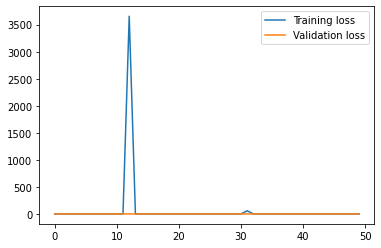

In [ ]:
Mean_loss = np.mean(history.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(history.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [ ]:
# Unfortunately, the model with optimized parameters (5.6%) performs worst than the original model (mean loss 0.47%). This could be explain by the consecutive grid search
# method where we assume that the order of the steps does not influence the result, as an example, we first find the number of epochs and then the optimizer but a better combinaison of epochs / optimizer 
# could exist if we include both parameters in one grid. However, this would be too ressource intensive to run.
# The more likely explanation is that we made a mistake somewhere that we were not able to find out.

## Calculation of prediction interval(90% confidence level)

** For 90% confidence level, t-multiplier is 1.645 which is calculated from degree of freedom of the sample.


t-multiplier(1.645) * standard deviation(stdev) gives the magnitude of interval.

The minimum and maximum range is given by :
confidence min = value-interval
confidence max = value + interval

In [ ]:
sum_err = np.sum((dfs.Close[-y_pred_future.shape[0]:]-df_forecast['Close'])**2)

print(sum_err)

x = (1/(len(df_forecast))*sum_err)

stdev = np.sqrt(x)

interval = 	1.645*stdev

print(interval)

98132.41392466892
37.384824207191926


** Adding the Close Confidence Min and Close Confidence Max to the dataframe, Plus the original closing price data too.

In [ ]:
df_forecast['Close Confidence Min'] = df_forecast['Close'] - interval

df_forecast['Close Confidence Max'] = df_forecast['Close'] + interval

df_forecast['Orginal Close'] = dfs.Close[-y_pred_future.shape[0]:]

df_forecast

,Date,Close,Close Confidence Min,Close Confidence Max,Orginal Close
Date,,,,,
2021-05-27,2021-05-27,435.848328,398.463501,473.233154,457.743256
2021-05-28,2021-05-28,437.059692,399.674866,474.444519,462.294464
2021-06-01,2021-06-01,439.174377,401.789551,476.559204,458.359894
2021-06-02,2021-06-02,441.606506,404.221680,478.991333,463.664734
2021-06-03,2021-06-03,444.507996,407.123169,481.892822,454.924469
...,...,...,...,...,...
2022-02-18,2022-02-18,573.149719,535.764893,610.534546,579.989990
2022-02-22,2022-02-22,572.372559,534.987732,609.757385,577.460022
2022-02-23,2022-02-23,571.207764,533.822937,608.592590,565.190002


** Ploting the Closing Price(Original and Predicted) with the Close Confidence Min as 'Lower Bound' and Close Confidence Max as 'Upper Bound' which gives the idea of the Model's 90% Confidence Level.

In [ ]:

     
fig3=go.Figure(data=[
                        go.Scatter(
                                    name = 'Close',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Orginal Close']),
                     
                        go.Scatter(
                                    name = 'Close Predicted',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close']),

                        go.Scatter(
                                    name='Upper Bound',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close Confidence Max'],
                                    mode='lines',
                                    marker=dict(color="green"),
                                    line=dict(width=1),
                                    showlegend=False),

                         go.Scatter(
                                    name='Lower Bound',
                                    x= df_forecast['Date'],
                                    y= df_forecast['Close Confidence Min'],
                                    marker=dict(color="purple"),
                                    line=dict(width=1),
                                    mode='lines',
                                    fillcolor='rgba(68, 68, 68, 0.3)',
                                    fill='tonexty',
                                    showlegend=False)

                    ])

fig3.show()

###Question 20:  Calculation of prediction interval for your prediction and explain the time series plots
